In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib

%pip install seaborn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   -------------------- ------------------- 5.8/11.5 MB 39.0 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 37.9 MB/s eta 0:00:00
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 10.3 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Introducción 

En este cuademo vamos a analizar los datos de salud mental del data

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

# Leer el archivo CSV
data = pd.read_csv('portugal_housing.csv')

C:\Users\pablo\AppData\Local\Temp\ipykernel_8128\1494297665.py:8: DtypeWarning: Columns (6,7,9,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('portugal_housing.csv')


# Descripción del dataset



This [dataset](https://www.kaggle.com/datasets/luvathoms/portugal-real-estate-2024) contains the more than 100k real asking prices for real estate properties listed on Portuguese real estate websites. The data was legally and ethically scraped from several online platforms, ensuring compliance with the platforms' terms and conditions.

The dataset includes detailed information about each property listing, such as:

- **Price**: The asking price of the property in Euros.
- **District, City, Town**: The geographical location of the property, allowing for regional analysis.
- **Type**: The type of property (e.g., Apartment, House, Garage, Land).
- **EnergyCertificate**: The energy efficiency rating of the property, according to Portuguese energy certification standards.
- **Area Measurements**: Several columns related to the size and area of the property, including:
- **GrossPrivateArea**: The private gross area of the property.
- **UsableArea**: The area that can be used for living.
- **LivingArea**: The actual livable space inside the property.
- **LotSize**: The size of the land associated with the property.
- **BuiltArea**: The total constructed area of the property.
- **Rooms, Bedrooms, Bathrooms, WCs**: Detailed breakdowns of the number of rooms, bedrooms, bathrooms, and water closets in the property.
- **Floor**: The floor on which the property is located.
- **Parking, Garage**: Information on parking availability and the presence of a garage.
- **Additional Features**: Whether the property includes amenities like elevators or electric car charging stations.
- **ConstructionYear**: The year the property was built.
- **PublishDate**: The date when the listing was published.

The dataset is suitable for a variety of analyses, including:

Price trends: Understanding the relationship between location, property features, and asking prices.
Energy efficiency: Investigating how energy certification impacts property values.
Geographical analysis: Exploring regional differences in real estate pricing across Portugal.
This dataset offers a comprehensive snapshot of the Portuguese real estate market, enabling users to gain insights into current pricing, property types, and location-based factors influencing the market.

# Análisis de los datos

Tareas
- [ ] Añadir graficos categóricos

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114623 entries, 0 to 114622
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Price                 114379 non-null  float64
 1   District              114623 non-null  object 
 2   City                  114623 non-null  object 
 3   Town                  114621 non-null  object 
 4   Type                  114607 non-null  object 
 5   EnergyCertificate     114609 non-null  object 
 6   Floor                 27929 non-null   object 
 7   Lift                  68215 non-null   object 
 8   Parking               114429 non-null  float64
 9   HasParking            68215 non-null   object 
 10  ConstructionYear      73550 non-null   float64
 11  TotalArea             108171 non-null  float64
 12  GrossArea             27638 non-null   float64
 13  PublishDate           15056 non-null   object 
 14  Garage                46376 non-null   object 
 15  

In [15]:
data.describe()

,Price,Parking,ConstructionYear,TotalArea,GrossArea,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
count,1.143790e+05,114429.000000,73550.000000,1.081710e+05,2.763800e+04,65268.000000,30692.000000,41526.000000,8.736300e+04,2.892900e+04,1.838900e+04,109268.000000
mean,3.666081e+05,0.584659,1988.796886,6.040103e+05,2.789733e+03,3.107648,2.674834,0.405866,1.541565e+03,7.345446e+04,3.682449e+03,1.502791
std,4.128282e+06,0.884952,26.747677,1.868002e+08,1.153670e+05,11.057877,1.903549,1.022958,3.773047e+04,6.091748e+06,1.404187e+05,1.707441
min,1.000000e+02,0.000000,1900.000000,-7.196067e+06,-7.000000e+00,0.000000,0.000000,-15.000000,0.000000e+00,0.000000e+00,-1.000000e+00,-13.000000
25%,7.800000e+04,0.000000,1972.000000,9.500000e+01,1.000000e+02,2.000000,2.000000,0.000000,8.000000e+01,2.960000e+02,1.074500e+02,0.000000
50%,2.000000e+05,0.000000,1994.000000,1.770000e+02,1.640000e+02,3.000000,3.000000,0.000000,1.210000e+02,7.950000e+02,1.781000e+02,1.000000
75%,3.900000e+05,1.000000,2008.000000,6.210000e+02,2.940000e+02,4.000000,3.000000,0.000000,2.150000e+02,3.300000e+03,3.223500e+02,2.000000
max,1.380000e+09,3.000000,2024.000000,6.142007e+10,1.275000e+07,2751.000000,21.000000,59.000000,5.429000e+06,9.923010e+08,1.275000e+07,90.000000


In [ ]:
percentile_80 = data["Price"].quantile(0.90)
percentile_90 = data["Price"].quantile(0.80)

print(f"El 80% de los precios es: {percentile_80}")
print(f"El 90% de los precios es: {percentile_90}")
print(f"El 95% de los precios es: {data["Price"].quantile(0.95)}")

# Filtrar el dataset para excluir valores mayores al límite superior
df_filtrado = data[data["Price"] <= limite_superior]

El 80% de los precios es: 750000.0
El 90% de los precios es: 460000.0
El 90% de los precios es: 1190000.0


Como se puede apreciar en los datos anteriores


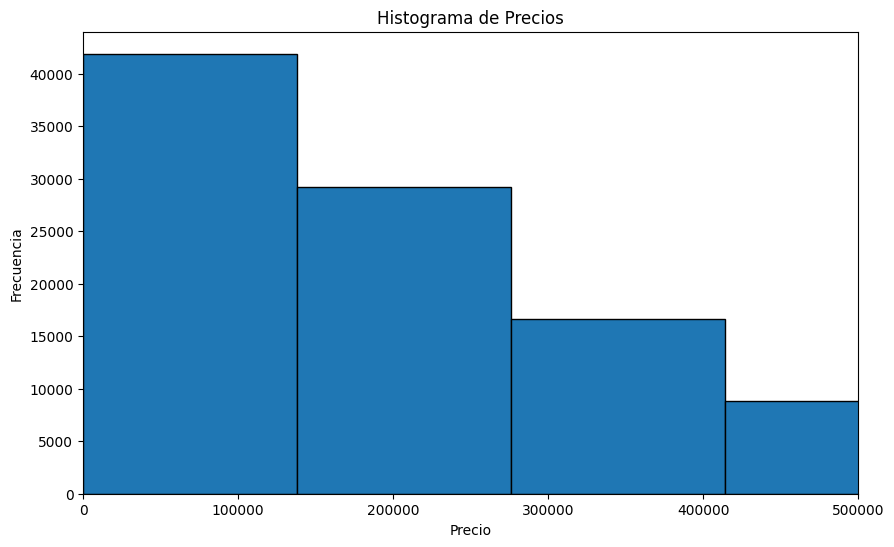

In [53]:
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=10000, edgecolor='black')  # Ajusta el número de bins según lo que necesites
plt.xlim((0,500000))
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

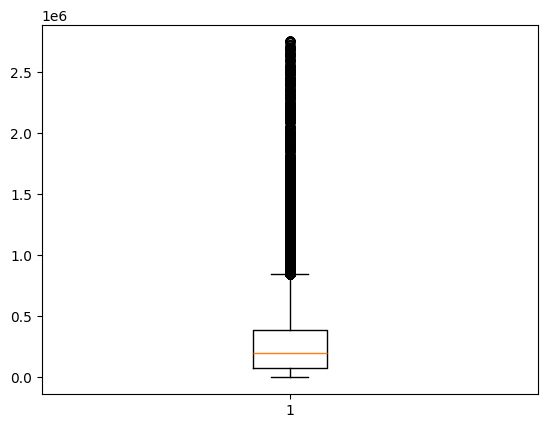

In [67]:
limite_superior = data["Price"].quantile(0.99)

# Filtrar el dataset para excluir valores mayores al límite superior
df_filtrado = data[data["Price"] <= limite_superior]

plt.boxplot(df_filtrado["Price"])
plt.show()

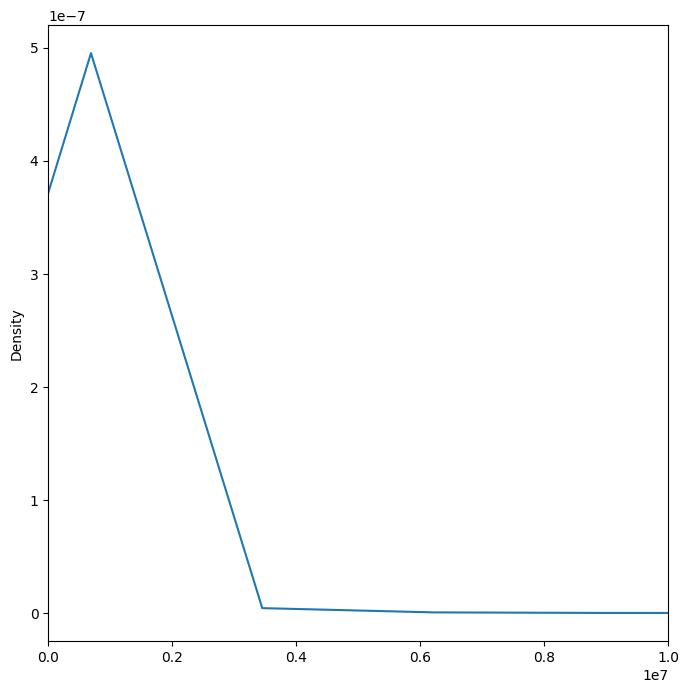

In [58]:
data['Price'].plot(kind="density",  # Create density plot
                      figsize=(8,8),    # Set figure size
                      xlim= (0,10000000));

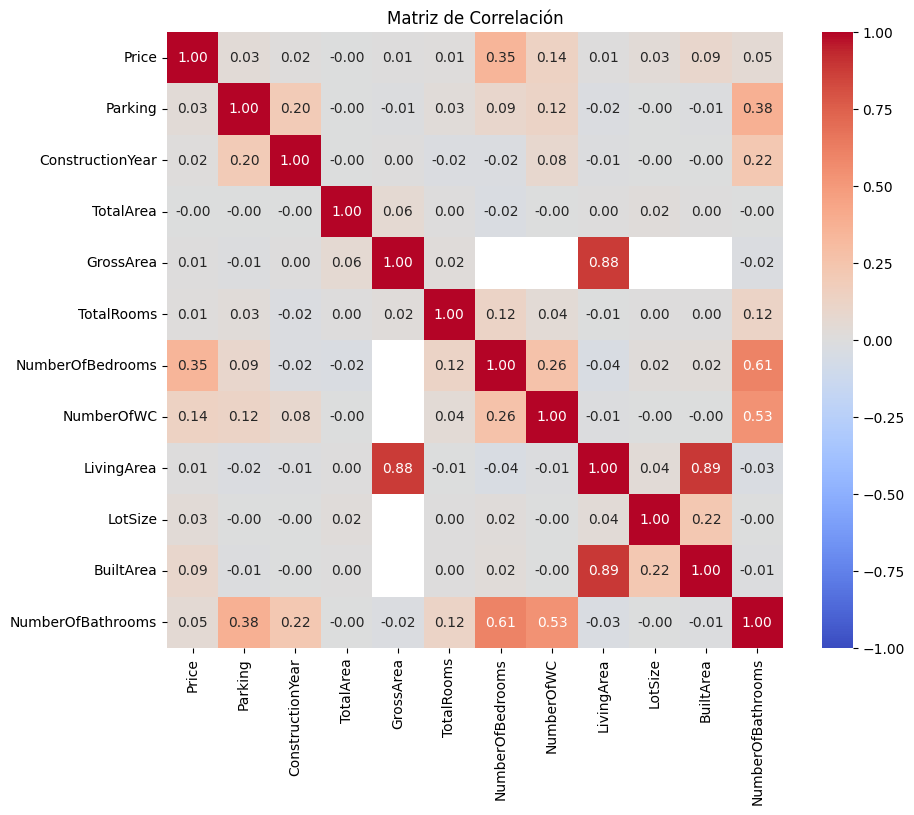

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numerical_data.corr(method='pearson')

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, square=True, fmt=".2f")

# Añadir título
plt.title("Matriz de Correlación")

# Mostrar el gráfico
plt.show()


In [ ]:
scores = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]

fig = plt.figure(figsize=(5, 12))
for i, sc in enumerate(scores):
    fig.add_subplot(4, 1, i+1)
    ax = movie_reviews[sc].plot(kind='hist')
    ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(sc)
    ax.grid()

plt.show()
